In [1]:
import sys

sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from data.dataset import MyKarateClub
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.utils import to_networkx

## Dataset Overview

In [3]:
dataset = MyKarateClub()

dataset.data

Data(x=[34, 1], edge_index=[2, 156], y=[34], train_mask=[34])

In [4]:
dataset.get_summary()

/Users/haru256/repo/github.com/haru-256/graph-neural-network-sandbox/.venv/lib/python3.11/site-packages/torch_geometric/data/summary.py:34: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1807.)
  std=data.std().item(),


KarateClub (#graphs=1):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |       34 |      156 |
| std        |      nan |      nan |
| min        |       34 |      156 |
| quantile25 |       34 |      156 |
| median     |       34 |      156 |
| quantile75 |       34 |      156 |
| max        |       34 |      156 |
+------------+----------+----------+

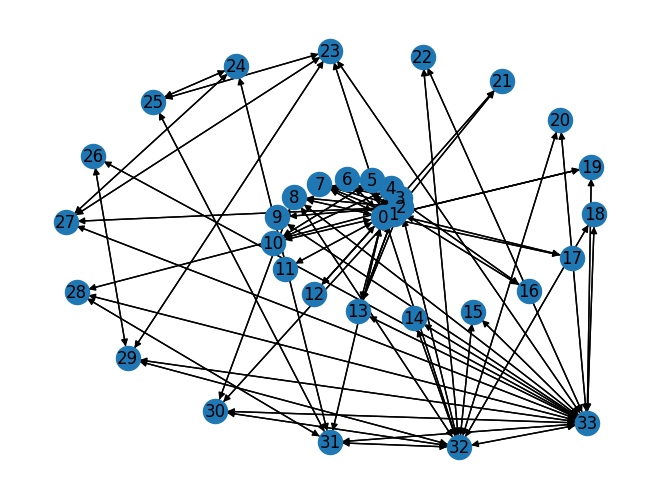

In [5]:
G = to_networkx(dataset.data)
nx.draw(G, with_labels=True, pos=nx.spiral_layout(G))

## Mini-batches from One Graph

In [6]:
dataloader = NeighborLoader(
    dataset.data, num_neighbors=[10, 5], batch_size=1, shuffle=False
)
batch = next(iter(dataloader))

In [7]:
batch

Data(x=[20, 1], edge_index=[2, 48], y=[20], train_mask=[20], n_id=[20], e_id=[48], input_id=[1], batch_size=1)

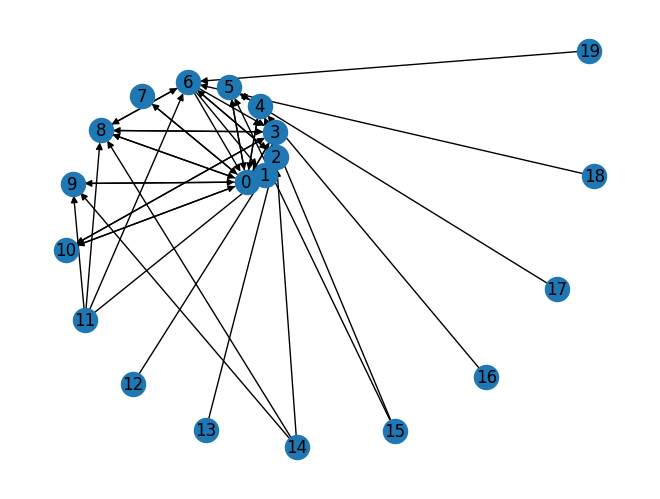

In [9]:
label = {id: dataset.node_index_map[id] for id in batch.n_id.tolist()}
G = to_networkx(batch)
nx.draw(G, label=label, with_labels=True, pos=nx.spiral_layout(G))

## Edge Split into train/val/test for Link Prediction

In [24]:
transform = RandomLinkSplit(
    is_undirected=True, split_labels=True, add_negative_train_samples=False
)
train_data, val_data, test_data = transform(dataset.data)

Data(x=[34, 1], edge_index=[2, 112], y=[34], train_mask=[34], pos_edge_label=[56], pos_edge_label_index=[2, 56])
Data(x=[34, 1], edge_index=[2, 112], y=[34], train_mask=[34], pos_edge_label=[7], pos_edge_label_index=[2, 7], neg_edge_label=[7], neg_edge_label_index=[2, 7])
Data(x=[34, 1], edge_index=[2, 126], y=[34], train_mask=[34], pos_edge_label=[15], pos_edge_label_index=[2, 15], neg_edge_label=[15], neg_edge_label_index=[2, 15])


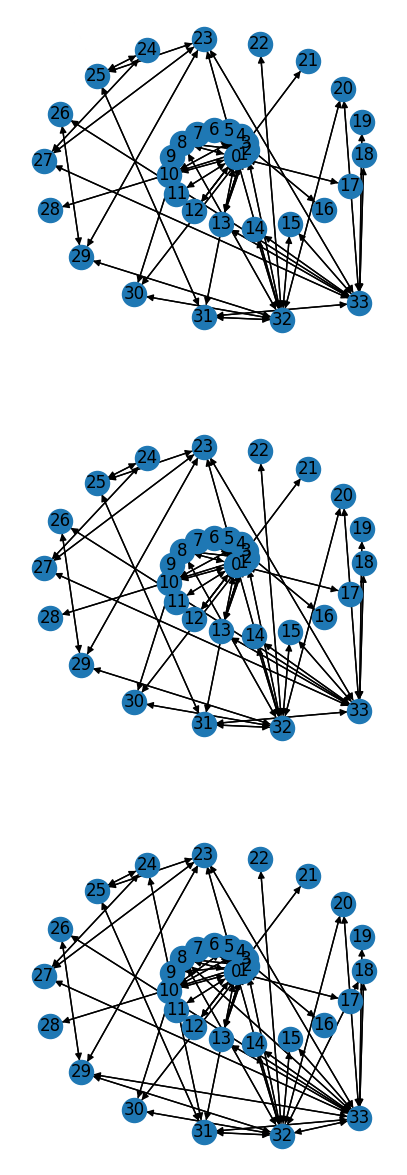

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

for data, ax in zip([train_data, val_data, test_data], axes.flatten()):
    G = to_networkx(data)
    label = {id: dataset.node_index_map[id] for id in data.x.squeeze().tolist()}
    nx.draw(G, ax=ax, label=label, with_labels=True, pos=nx.spiral_layout(G))
    print(data)

In [26]:
train_data.pos_edge_label_index

tensor([[23,  2, 20,  0,  0,  4,  2, 24, 15,  2, 27,  0,  3,  1,  3, 23, 26,  0,
         13,  3, 24,  1, 14,  0,  0,  1,  0,  4, 30,  0,  8,  2, 14,  0, 18, 25,
          0, 15, 26, 19,  5, 31,  5,  1, 23, 22, 23, 20,  2,  8, 29, 31,  2,  0,
         23,  0],
        [25,  7, 32,  3, 17, 10, 28, 25, 32,  8, 33,  4,  7, 30, 13, 33, 33, 21,
         33, 12, 27, 13, 32, 31,  5,  2, 12,  6, 32, 11, 30,  3, 33,  8, 33, 31,
         10, 33, 29, 33, 16, 32,  6,  3, 32, 32, 27, 33, 13, 32, 32, 33, 32,  6,
         29,  2]])

In [19]:
test_data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])